# 1) Gerekli Kütüphanelerin Yüklenmesi

In [77]:
# Gerekli kütüphaneleri yükleyelim.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #Görselleştirme yapmak için 
import seaborn as sns  #Görselleştirme yapmak için 

import warnings
warnings.filterwarnings("ignore")

!pip install missingno 
import missingno as msno

# 2) Veri Setinin Hazırlanması

In [78]:
# Veri setinin yüklenmesi
df = pd.read_csv(filepath_or_buffer = "/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

In [79]:
# Eksik Değerlerin Kontrol Edilmesi
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


Bu kod, veri setindeki eksik değerlerin sayısını kontrol eder ve her sütun için eksik değerlerin toplamını konsola yazdırır.

- **`isnull()` fonksiyonu:** DataFrame üzerindeki tüm hücreleri kontrol eder ve eksik değerler (NaN) için `True`, diğer durumlarda `False` döndürür.
- **`sum()` fonksiyonu:** Her sütundaki `True` değerlerini (eksik değerleri) toplar ve eksik değer sayısını verir.
- **`print()` fonksiyonu:** Sütun adlarıyla birlikte eksik değerlerin sayısını ekrana yazdırır.

**Amaç:** Bu kod, eksik veri analizi yapmak için kullanılır. Çıktıda her sütun için eksik veri sayıları yer alır, bu da veri temizleme işlemi öncesinde eksik veri oranlarını anlamak için faydalıdır.

Date ve Location sütunlarında eksik değer bulunmamaktadır (0).

In [80]:
#Projede istendiği üzere veri setinde rastgele eksik değerler oluşturalım. 

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [81]:
print(df.isnull().sum())

Date              4323
Location          4238
MinTemp           5778
MaxTemp           5536
Rainfall          7489
Evaporation      65270
Sunshine         72099
WindGustDir      14279
WindGustSpeed    14275
WindDir9am       14562
WindDir3pm        8380
WindSpeed9am      5919
WindSpeed3pm      7286
Humidity9am       7011
Humidity3pm       8637
Pressure9am      18986
Pressure3pm      18865
Cloud9am         58443
Cloud3pm         61911
Temp9am           5996
Temp3pm           7908
RainToday         7399
RainTomorrow      7445
dtype: int64


**Eksik Değerler Kontrolü Sonrası Güncel Durum**

 Eksik değer ekleme işlemi sonrası, her sütundaki eksik (NaN) değerlerin sayısında artış görülmüştür.

 **Değişiklikler:**

Date ve Location gibi sütunlarda, başlangıçta eksik değer yokken artık eksik değerler oluşmuştur.
* **Eksik Değer Artışı:** Örneğin, MinTemp sütunundaki eksik değerler 1485'ten 5778'e, Rainfall sütunundaki eksik değerler 3261'den 7489'a çıkmıştır.
Bu güncelleme, rastgele eksik değer ekleme işleminin veri setine başarılı bir şekilde uygulandığını göstermektedir. Eksik veriler, sonraki aşamalarda doldurma veya temizleme işlemleri için değerlendirilmelidir.

# 3) Veriye Bakış

In [82]:
# Veri setinin ilk 3 satırını görme
df.head(3)  

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [83]:
# Veri setindeki satır ve sütun sayısını görme
df.shape

(145460, 23)

In [84]:
# Veri setindeki değişkenlerin isimlerini yazdırma
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişme
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'] 

Veri seti içerisinde toplam 23 kolon vardır.



In [85]:
# Veri seti bilgilerinin görüntülenmesi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           141137 non-null  object 
 1   Location       141222 non-null  object 
 2   MinTemp        139682 non-null  float64
 3   MaxTemp        139924 non-null  float64
 4   Rainfall       137971 non-null  float64
 5   Evaporation    80190 non-null   float64
 6   Sunshine       73361 non-null   float64
 7   WindGustDir    131181 non-null  object 
 8   WindGustSpeed  131185 non-null  float64
 9   WindDir9am     130898 non-null  object 
 10  WindDir3pm     137080 non-null  object 
 11  WindSpeed9am   139541 non-null  float64
 12  WindSpeed3pm   138174 non-null  float64
 13  Humidity9am    138449 non-null  float64
 14  Humidity3pm    136823 non-null  float64
 15  Pressure9am    126474 non-null  float64
 16  Pressure3pm    126595 non-null  float64
 17  Cloud9am       87017 non-null

In [86]:
# Veri türlerinin incelenmesi 
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [87]:
# Özelliklerin Türüne Göre Ayrılması
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

Bu kod bloğu, veri setindeki sütunları türlerine göre kategorik ve sayısal olarak iki listeye ayırır:

**Kategorik Özellikler (Categorical Features):** Metinsel veya kategorik veri türündeki sütunlar.

**Sayısal Özellikler (Numerical Features):** Float veya integer veri türündeki sütunlar.

In [88]:
categorical_features, numerical_features

(['Date',
  'Location',
  'WindGustDir',
  'WindDir9am',
  'WindDir3pm',
  'RainToday',
  'RainTomorrow'],
 ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'])

In [89]:
# Sayısal sütunlar için temel istatistiksel verileri döndürme
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,139682.0,12.193361,6.396925,-8.5,7.6,12.0,16.8,33.9
MaxTemp,139924.0,23.223460,7.116643,-4.8,17.9,22.6,28.2,48.1
Rainfall,137971.0,2.356244,8.442242,0.0,0.0,0.0,0.8,371.0
Evaporation,80190.0,5.469419,4.197107,0.0,2.6,4.8,7.4,145.0
Sunshine,73361.0,7.606832,3.784406,0.0,4.8,8.4,10.6,14.3
WindGustSpeed,131185.0,40.035850,13.603008,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,139541.0,14.038877,8.915955,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,138174.0,18.668092,8.808865,0.0,13.0,19.0,24.0,87.0
Humidity9am,138449.0,68.884145,19.019753,0.0,57.0,70.0,83.0,100.0
Humidity3pm,136823.0,51.537008,20.798056,0.0,37.0,52.0,66.0,100.0


Bu kod, DataFrame'deki sayısal sütunlar için temel istatistiksel özet bilgileri sağlar ve ardından bu bilgileri **transpoze** eder.

- **`df.describe()`**: Sayısal sütunlar için aşağıdaki temel istatistiksel verileri döndürür:
  - `count`: Boş olmayan değerlerin sayısı.
  - `mean`: Ortalama değer.
  - `std`: Standart sapma.
  - `min`: En küçük değer.
  - `25%`: Verilerin %25'lik çeyrek dilimi.
  - `50%`: Verilerin medyanı (orta değeri).
  - `75%`: Verilerin %75'lik çeyrek dilimi.
  - `max`: En büyük değer.

- **`.T`**: Verilerin transpozunu alır, yani satır ve sütunları yer değiştirir. Bu, her bir istatistiksel ölçümün bir **satırda** yer almasını sağlar ve veriyi daha okunabilir hale getirir.

# 4) Eksik Veri Analizi

Eksik verilerin analiz edilmesi, hangi sütunlarda ve ne kadar eksik veri olduğunu anlamamıza yardımcı olur. Bu sayede eksik veriler için uygun stratejiler belirleyebiliriz.

Eksik veri analizi, veri temizliği sürecinin önemli bir parçasıdır ve veri seti üzerinde yapılacak işlemlerin doğruluğunu artırır.

In [90]:
# Bu aşamada eksik verilerimizi tekrar gözlemleyelim. 
df.isna().sum()

Date              4323
Location          4238
MinTemp           5778
MaxTemp           5536
Rainfall          7489
Evaporation      65270
Sunshine         72099
WindGustDir      14279
WindGustSpeed    14275
WindDir9am       14562
WindDir3pm        8380
WindSpeed9am      5919
WindSpeed3pm      7286
Humidity9am       7011
Humidity3pm       8637
Pressure9am      18986
Pressure3pm      18865
Cloud9am         58443
Cloud3pm         61911
Temp9am           5996
Temp3pm           7908
RainToday         7399
RainTomorrow      7445
dtype: int64

In [91]:
# Eksik verilerin toplam sayısı
df.isna().sum().sum() 

432035

In [92]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

Date             141137
Location         141222
MinTemp          139682
MaxTemp          139924
Rainfall         137971
Evaporation       80190
Sunshine          73361
WindGustDir      131181
WindGustSpeed    131185
WindDir9am       130898
WindDir3pm       137080
WindSpeed9am     139541
WindSpeed3pm     138174
Humidity9am      138449
Humidity3pm      136823
Pressure9am      126474
Pressure3pm      126595
Cloud9am          87017
Cloud3pm          83549
Temp9am          139464
Temp3pm          137552
RainToday        138061
RainTomorrow     138015
dtype: int64

In [93]:
#Eksik olmayan değerlerin toplam sayısı
df.notnull().sum().sum()

2913545

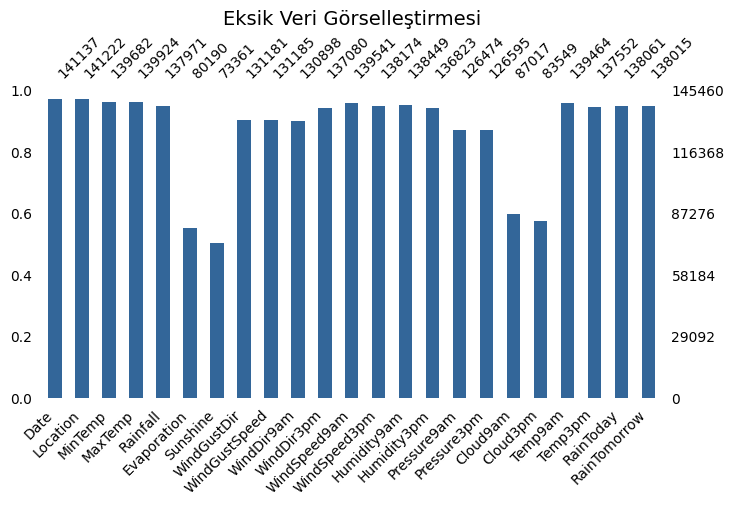

In [94]:
# Eksik veri görselleştirmesi 
msno.bar(df, 
         figsize=(8, 4), 
         fontsize=10,
         color=(0.2, 0.4, 0.6))  # Renk tonları RGB (0-1 arasında değerler)


plt.title('Eksik Veri Görselleştirmesi', fontsize=14)
plt.show()

Bu kod parçası, veri setindeki eksik değerlerin görselleştirilmesini sağlar. `missingno` kütüphanesinin `bar()` fonksiyonu kullanılarak, her bir sütundaki eksik ve eksik olmayan değerlerin oranı görsel olarak sunulur. Bu görselleştirme, eksik verilerin hangi sütunlarda yoğunlaştığını kolayca görmemizi sağlar.

#### Kullanılan Parametreler:
- `df`: Veri seti, eksik veri içeren DataFrame.
- `figsize=(8, 4)`: Görselleştirmenin boyutlarını belirler (8x4 inç).
- `fontsize=10`: Grafik üzerinde kullanılacak yazı tipi boyutunu belirler.
- `color=(0.2, 0.4, 0.6)`: Barların rengini tanımlar. Burada kullanılan renk, RGB formatında (0-1 arasında değerler) belirlenmiştir.

#### Sonuç:
Bu görselleştirme, eksik verilerin yoğunluk seviyesini göstermek için kullanılır. Bu sayede veri setindeki eksik değerlerin sayısal analizi ve görsel olarak izlenmesi mümkün olur.

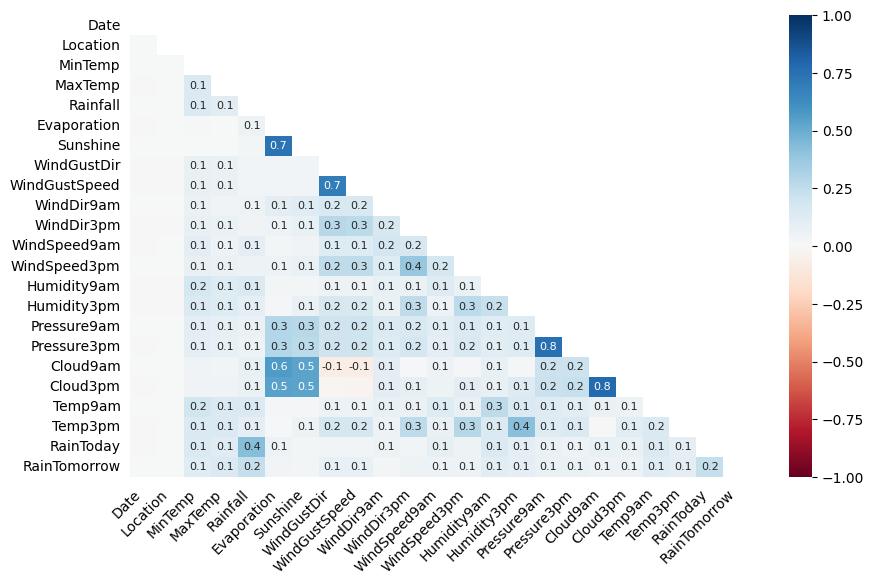

In [95]:
# Nullity Correlation (Heatmap)
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

Eksik veri analizinde, eksik verilerin birbirleriyle nasıl ilişkili olduğunu görmek için **Nullity Correlation Heatmap** kullanılır. Bu görselleştirme, her iki özelliğin eksik verilerinin birbirleriyle olan ilişkisini ısı haritası (heatmap) şeklinde sunar. 

- **Renk yoğunluğu**: Koyu renkler, eksik verilerin birbirleriyle daha yüksek bir ilişkiye sahip olduğunu gösterir.
- **1'e yakın değerler**: İki özellik arasındaki eksik veriler arasında güçlü bir ilişki olduğunu gösterir.
- **0 değerleri**: İki özellik arasındaki eksik veriler arasında ilişki olmadığını gösterir.


# Eksik Verilerin Silinmesi/Döndürülmesi

In [96]:
# Her satırdaki bütün değerlerin eksik olup olmadığını kontrol et (varsa sileceğiz)
rows_with_all_missing = df.isnull().all(axis=1)

# Eğer tüm değerleri eksik olan satırlar varsa, bunları yazdır
if rows_with_all_missing.any():
    print(f"Tüm değerleri eksik olan {rows_with_all_missing.sum()} satır bulundu.")
    print(df[rows_with_all_missing])  # Tüm değerleri eksik olan satırları görüntüle
else:
    print("Tüm değerleri eksik olan satır yok.")

Tüm değerleri eksik olan satır yok.


### Eksik Veri Temizleme ve Doldurma Stratejilerinin Seçimi

Eksik veriler, makine öğrenimi ve veri analizi süreçlerinde önemli bir sorun teşkil edebilir. Veri setindeki eksik değerleri uygun bir şekilde ele almak, modelin doğruluğunu artırmak ve yanlış sonuçların önüne geçmek için kritik bir adımdır. Bu projede, eksik verileri yönetmek için şu stratejiler seçilmiştir:

In [97]:
# 'Evaporation' ve 'Sunshine' sütunlarındaki eksik verileri silme
df = df.dropna(subset=['Evaporation', 'Sunshine'])

Bu sütunlar için eksik değerler silindi çünkü bu sütunlardaki eksik verilerin sayısal veri kalitesini bozması veya modelin doğruluğunu olumsuz etkilemesi olasıdır.

In [98]:
# Sayısal veriler için medyan ile doldurma
df[numerical_features] = df[numerical_features].apply(lambda col: col.fillna(col.median()))

* Sayısal verilere sahip sütunlardaki eksik değerler, medyan ile doldurulmuştur. Medyan, veri setindeki uç değerlerin (outlier) etkisinden korunarak merkezi eğilimi en iyi temsil eden istatistiksel ölçüdür.
* Sayısal verilerde ortalama yerine medyan kullanılması, uç değerlerin veri setini olumsuz etkilemesini engeller ve daha güvenilir bir sonuç elde edilmesini sağlar.
* Medyan kullanmak, özellikle verinin dağılımında anormal değerler bulunduğunda, modelin doğruluğunu artırmaya yardımcı olur.

In [99]:
# Kategorik veriler için mod ile doldurma
df[categorical_features] = df[categorical_features].apply(lambda col: col.fillna(col.mode()[0]))

* Kategorik verilerde eksik değerler, o sütunun en sık görülen değeri (mod) ile doldurulmuştur.
* Kategorik verilerde eksik bir değerin yerine mod koymak, verinin doğal dağılımını ve modelin öğrenme sürecini destekler.* 
Mod, kategorik veri setlerinde en yaygın olan değeri temsil eder ve eksik verileri anlamlı bir şekilde doldurur.* 
Bu strateji, kategorik sütunlar için verinin anlamlılığını koruyarak eksik değerlerin etkisini minimize eder.

In [100]:
# Zaman serisi verisi için ileri doldurma
df = df.fillna(method='ffill')

* Zaman serisi verisindeki eksik değerler, bir önceki geçerli değer ile doldurulmuştur. Bu strateji, zaman sırasına dayalı verilere sahip sütunlar için oldukça yaygındır.* 
Zaman serisi verilerinde, eksik değerlerin bir önceki değeriyle doldurulması, veri setinin sürekliliğini ve tutarlılığını korur. Bu yöntem, özellikle verinin zamanla değişen dinamiklerini anlamak için faydalıdır.* 
Verinin zaman sırasını ve ardışıklığını koruyarak modelin doğruluğunu ve tahmin kabiliyetini artırır.

In [101]:
print(df.isnull().sum().sum())

0


Yaptığım işlemler sonucu eksik bir verimin kalmadığını gözlemliyorum.

# Görselleştirmeler/Grafikler

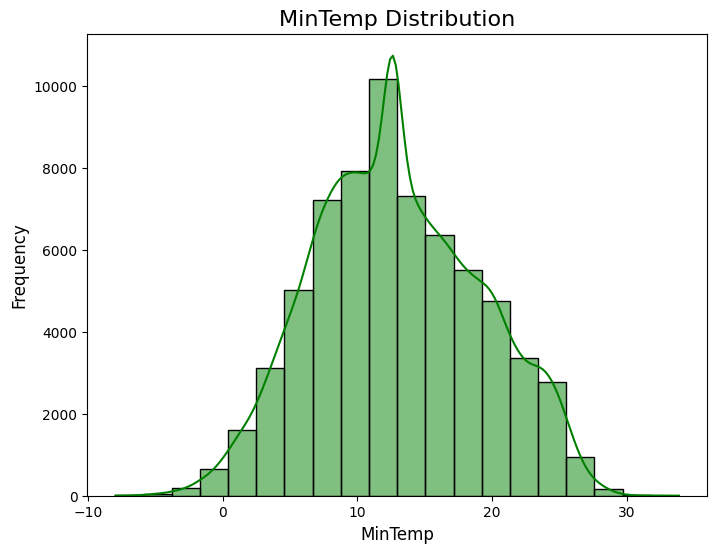

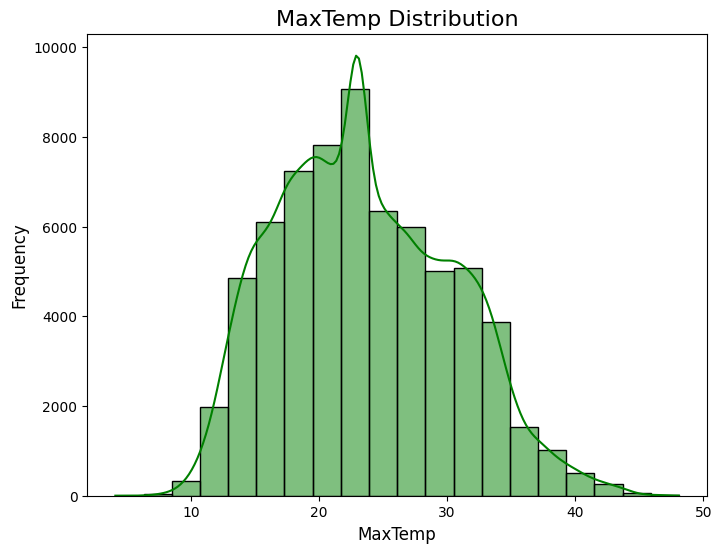

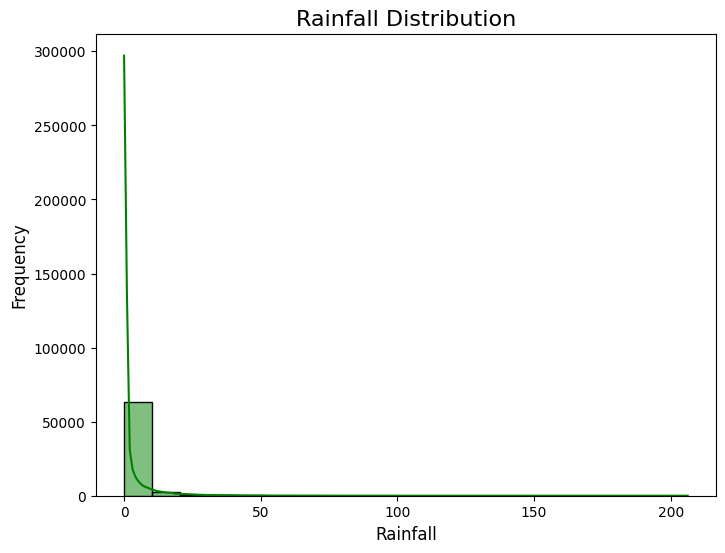

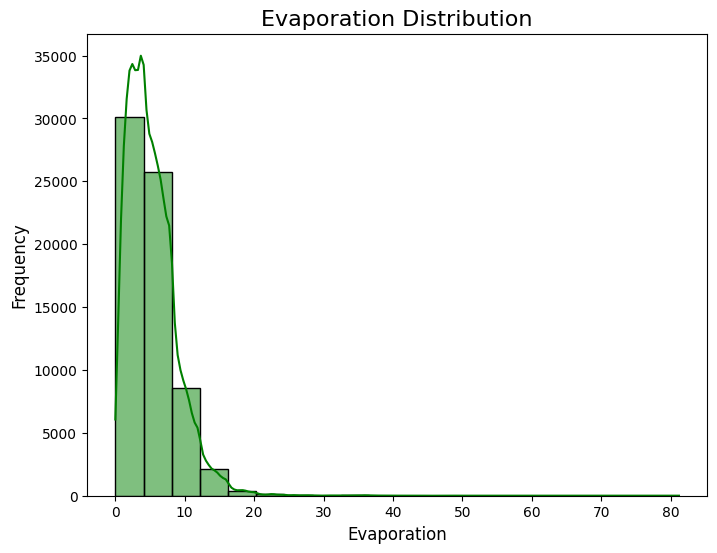

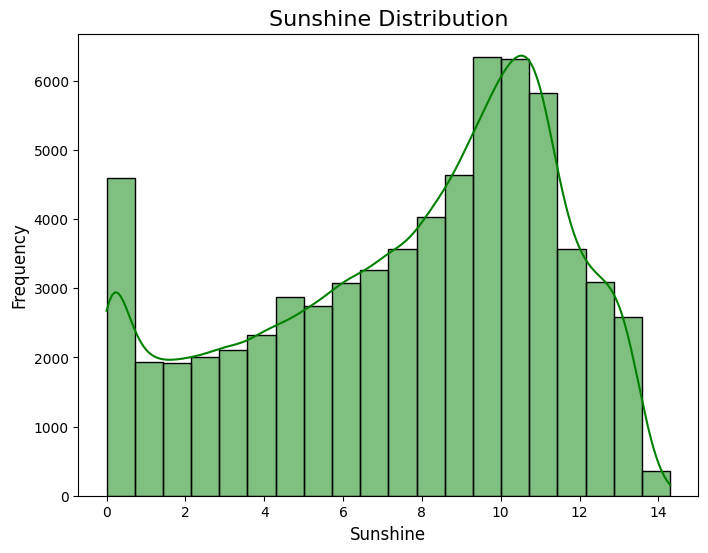

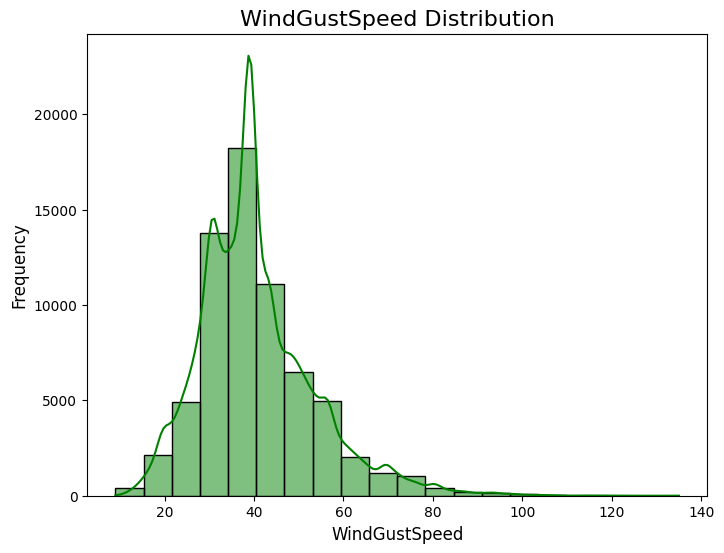

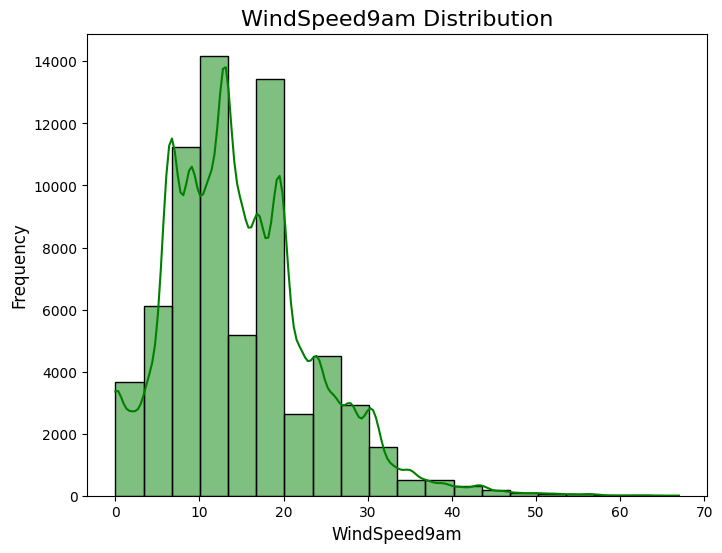

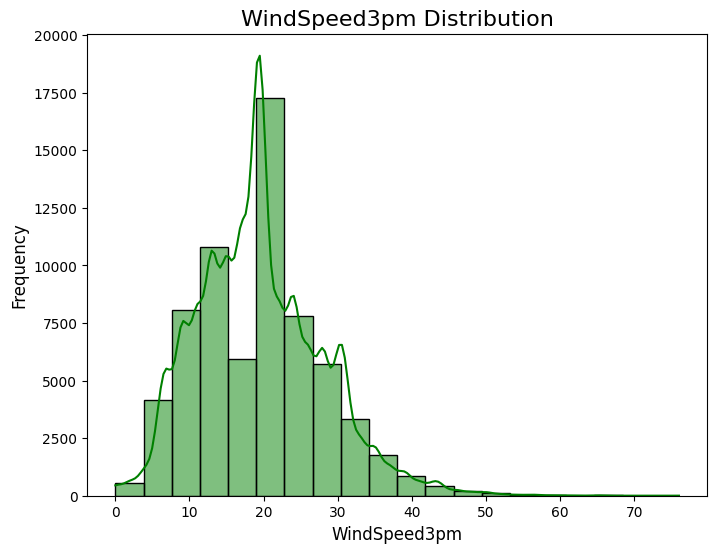

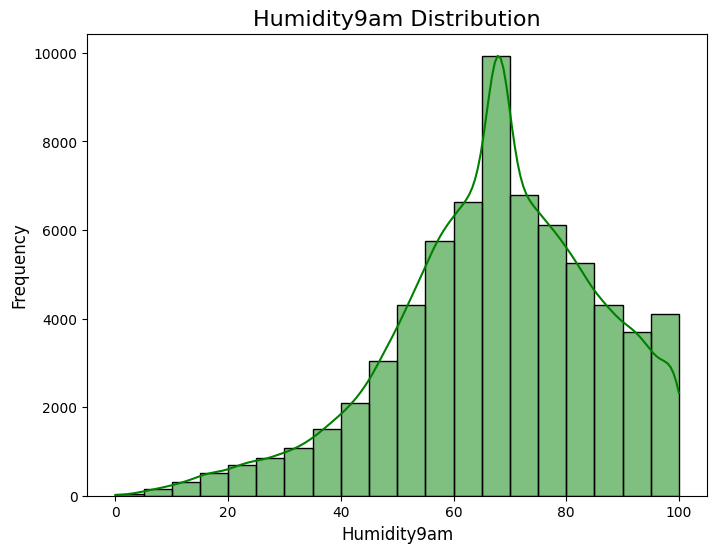

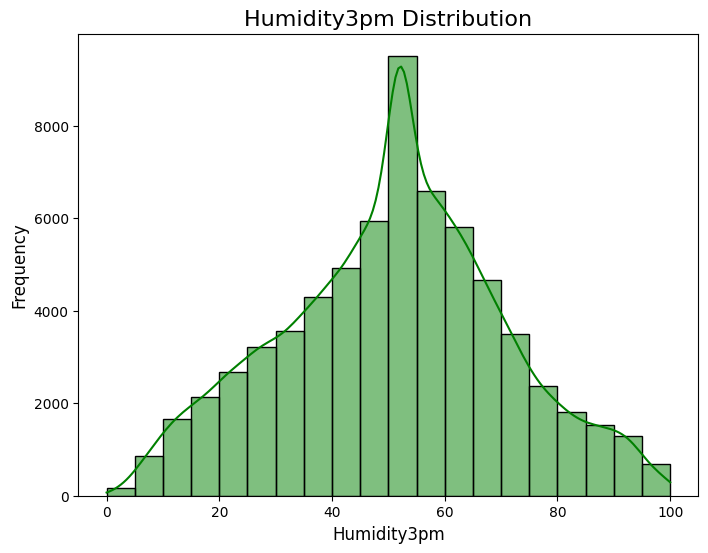

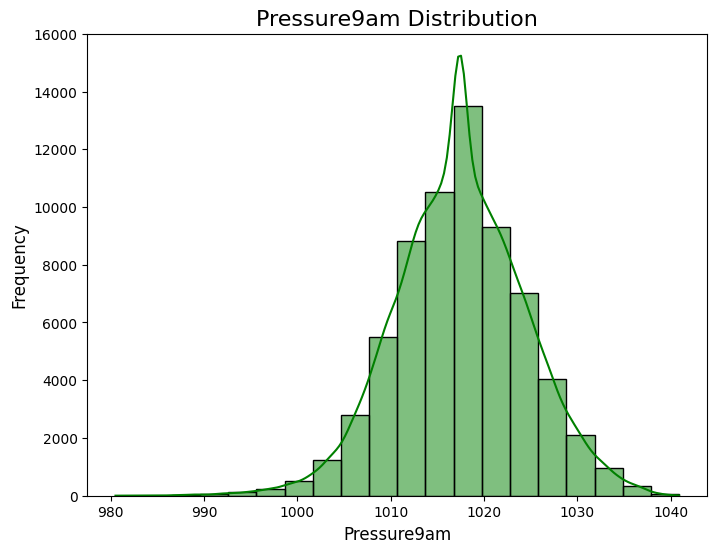

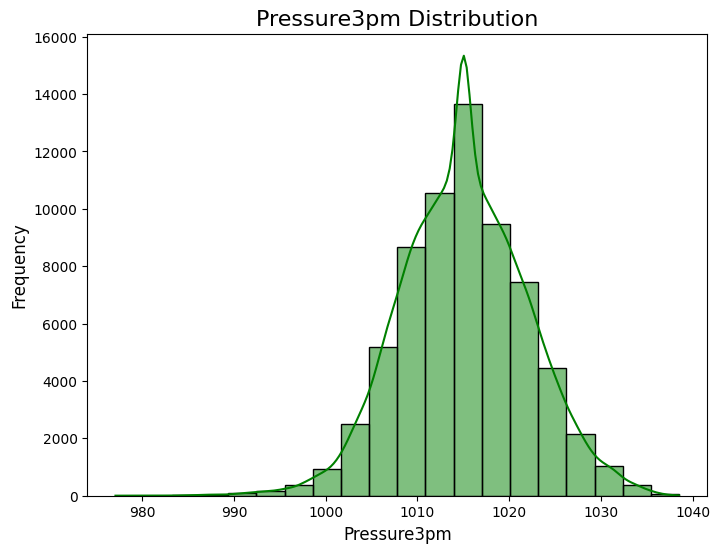

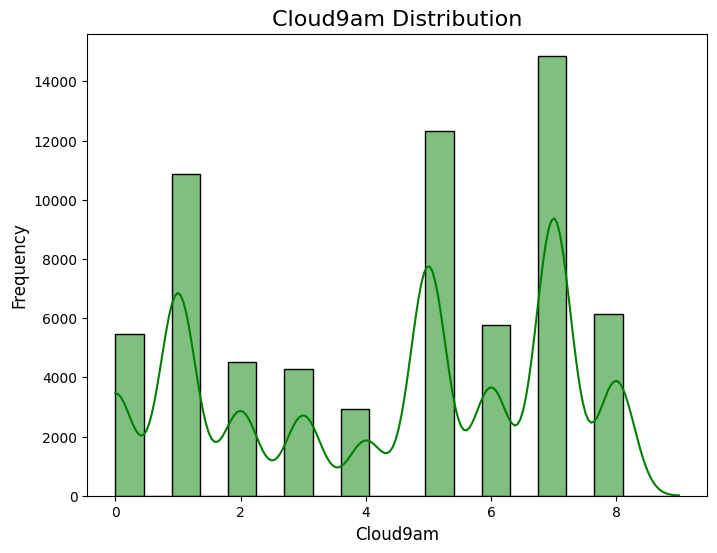

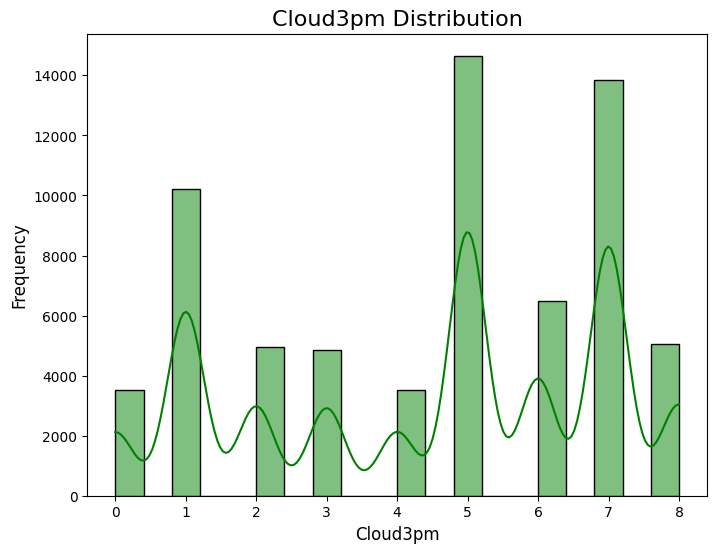

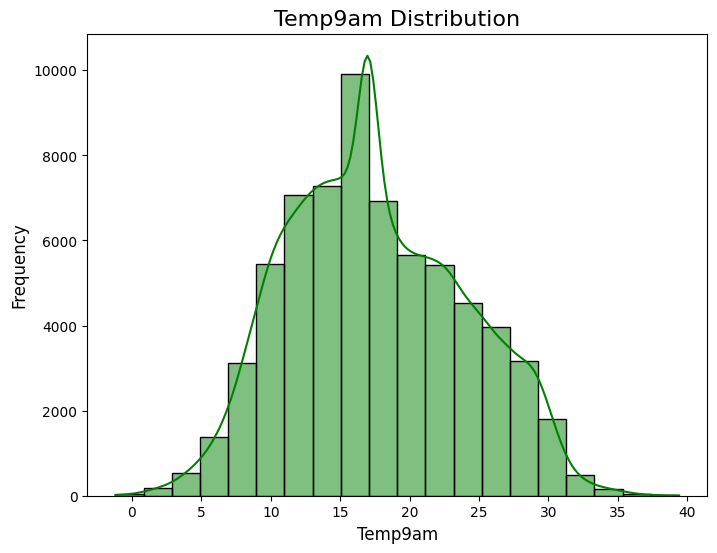

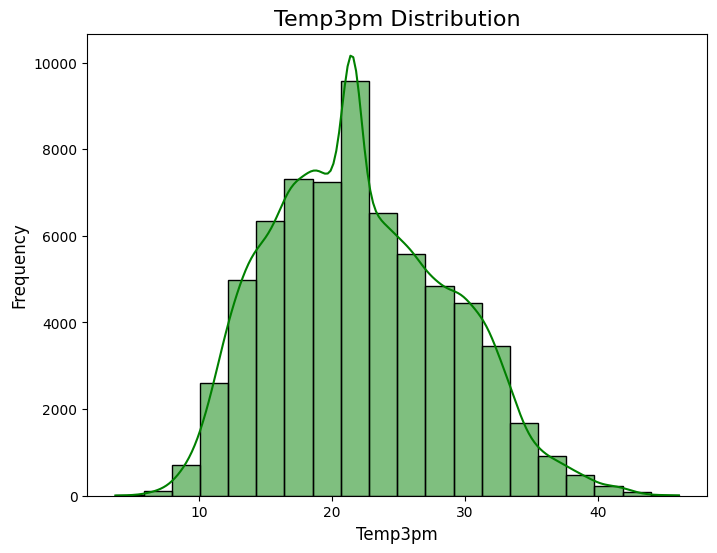

In [102]:
# Tüm sayısal sütunlar için histogram oluşturma
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True, color='green')
    plt.title(f'{col} Distribution', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

* Histogramlar, sayısal verilerin dağılımını ve yayılımını görmek için oldukça faydalıdır. Bu görselleştirme, verinin normal dağılıma ne kadar yakın olduğunu, uç değerlerin (outliers) varlığını ve genel dağılımın şeklini anlamaya yardımcı olur.* 
KDE (Kernel Density Estimate) çizgisi, veri setinin yoğunluk tahminini göstererek, verinin hangi aralıkta daha yoğun olduğunu ve hangi bölgelerde daha seyrek olduğunu görmemizi sağlar.* 
Bu görselleştirme, veri analizinin başlangıç aşamalarında önemli bir adımdır, çünkü veri setindeki sayısal sütunların özelliklerini daha iyi anlamamıza yardımcı olur

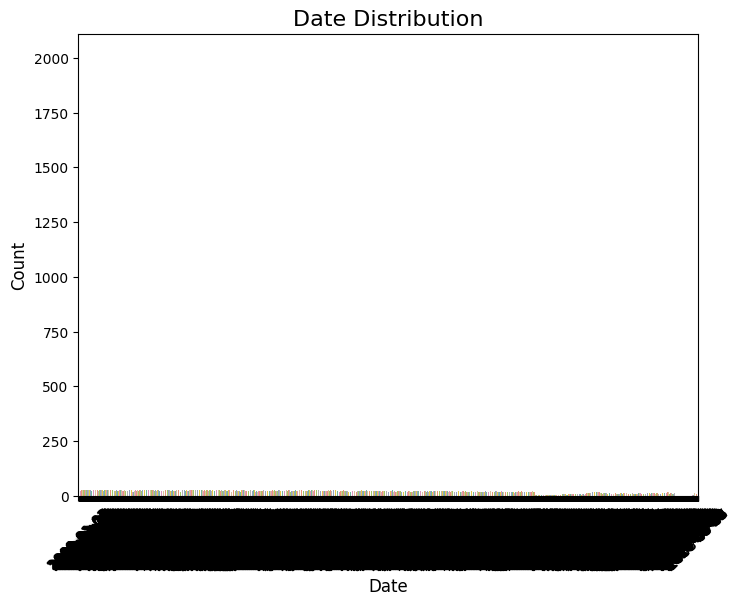

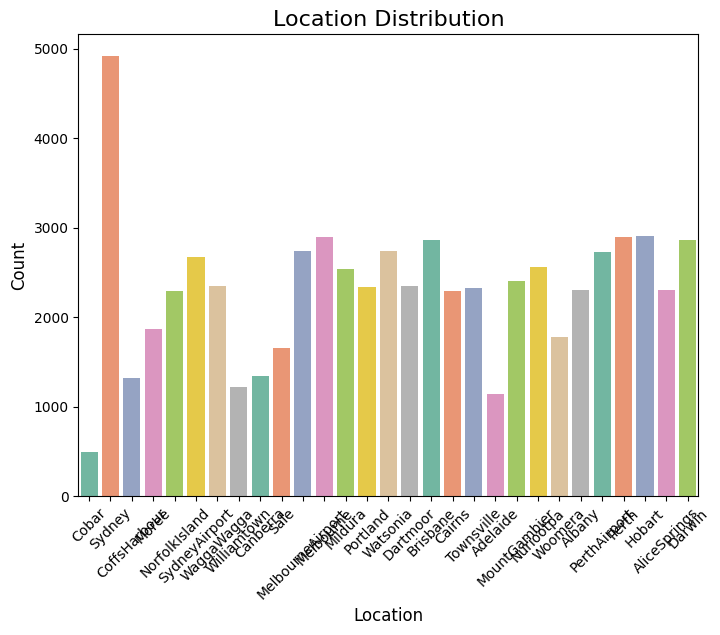

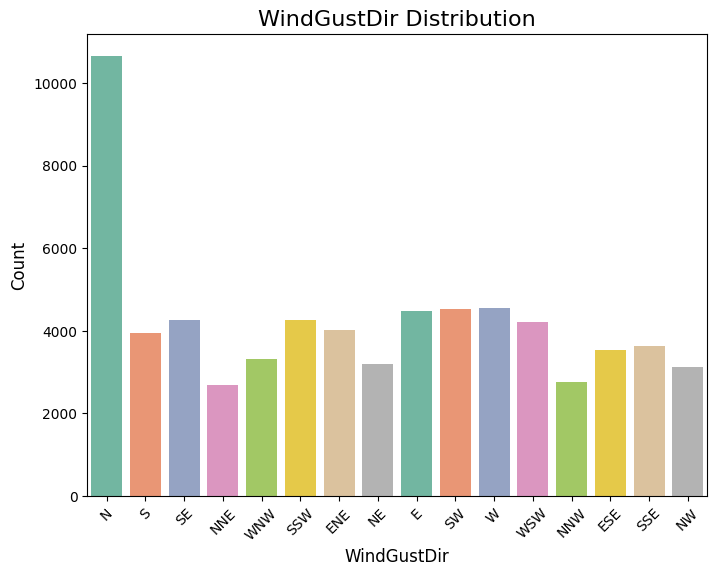

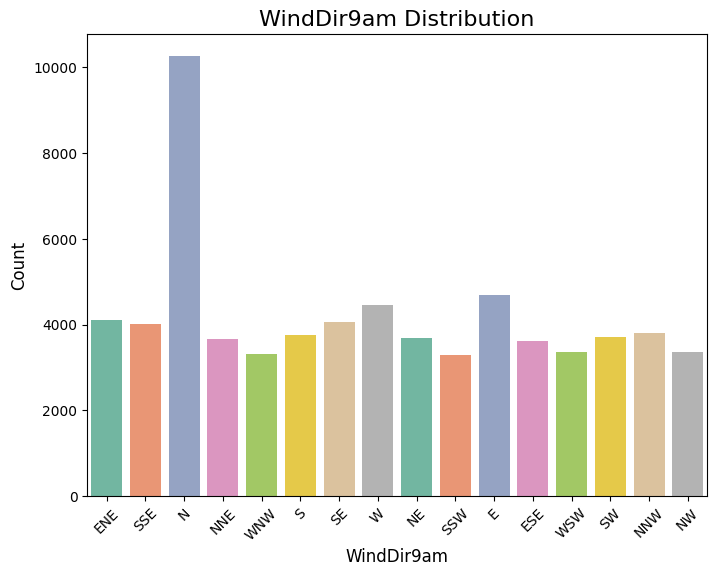

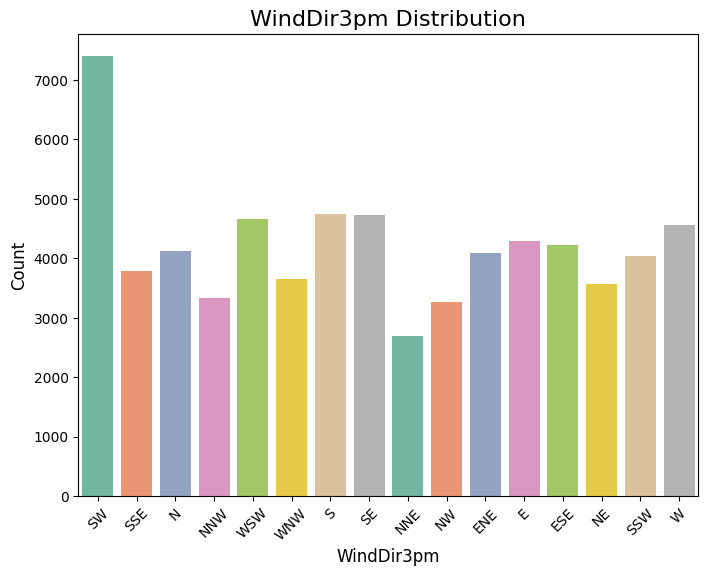

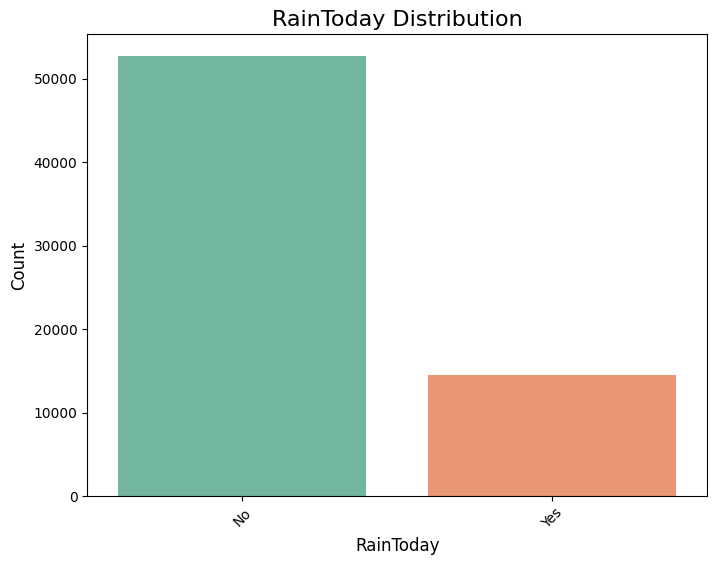

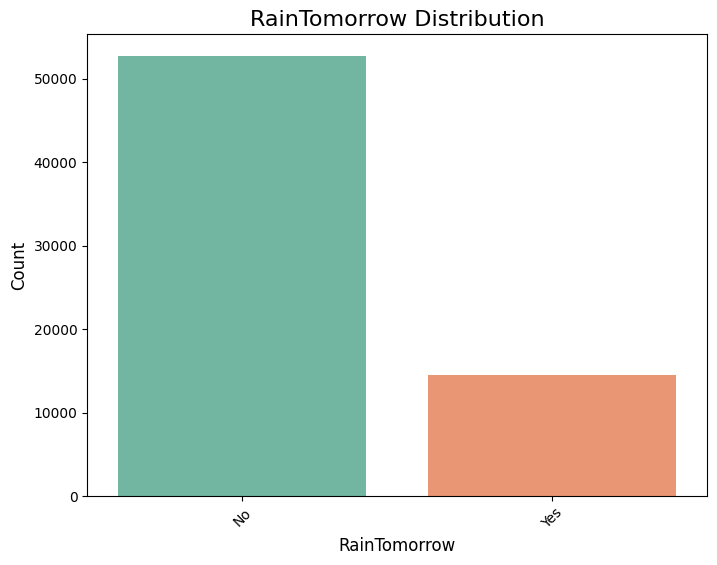

In [103]:
# Tüm kategorik sütunlar için bar chart
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'{col} Distribution', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Kategoriler uzun ise döndür
    plt.show()

* Çubuk grafikler, kategorik verilerin dağılımını incelemek için mükemmel bir araçtır. Bu görselleştirme, her bir kategorik değişkenin içerdiği farklı değerlerin sıklığını hızlı bir şekilde anlamamıza yardımcı olur.* 
Kategorik verilerde, her bir kategorinin gözlem sayısını net bir şekilde görmek, veri analizi sırasında önemli bir adımdır. Bu adım, veri setindeki dengeyi, azınlık sınıfları veya anormal kategorileri keşfetmeye yardımcı olabilir.

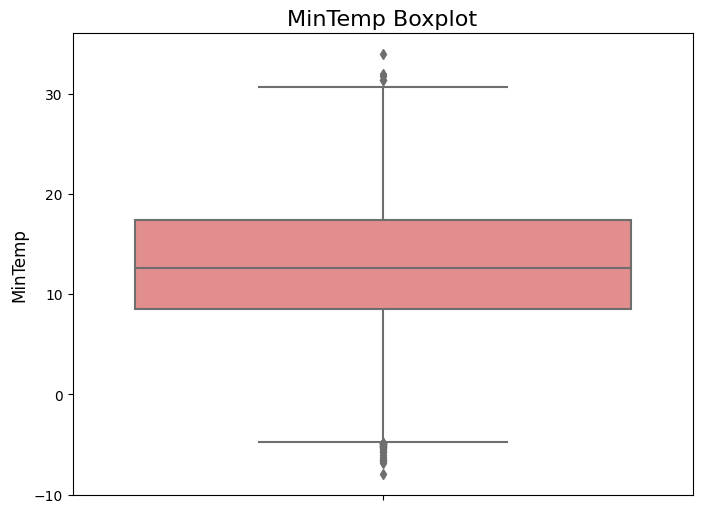

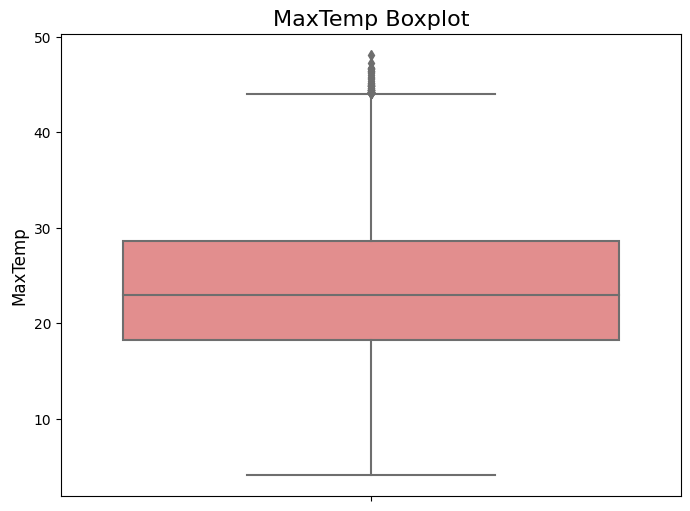

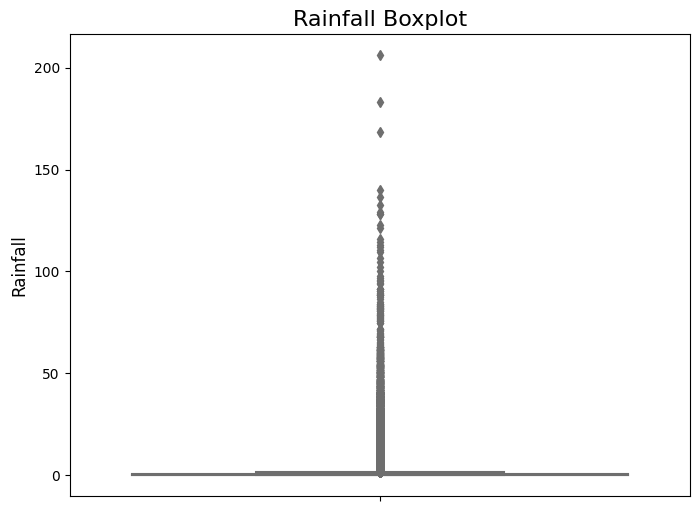

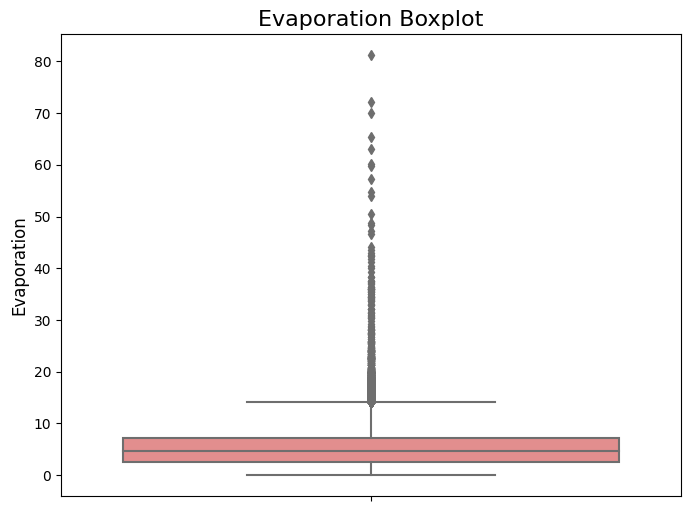

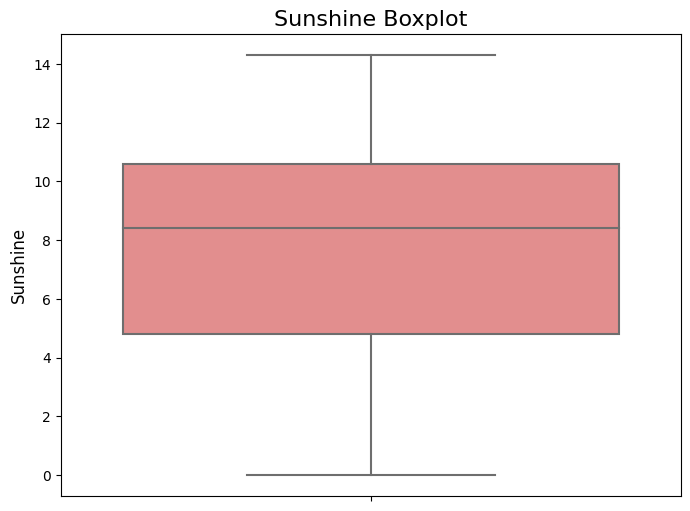

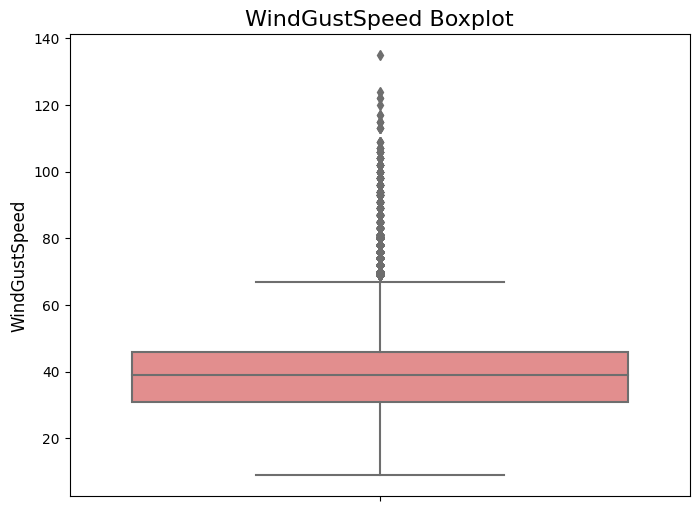

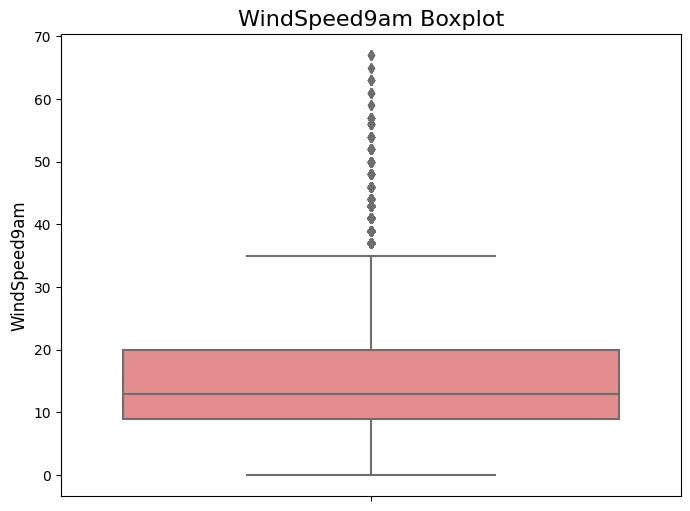

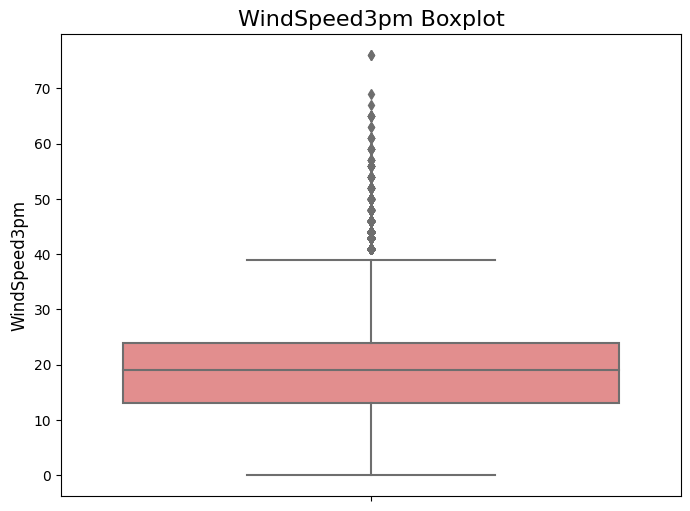

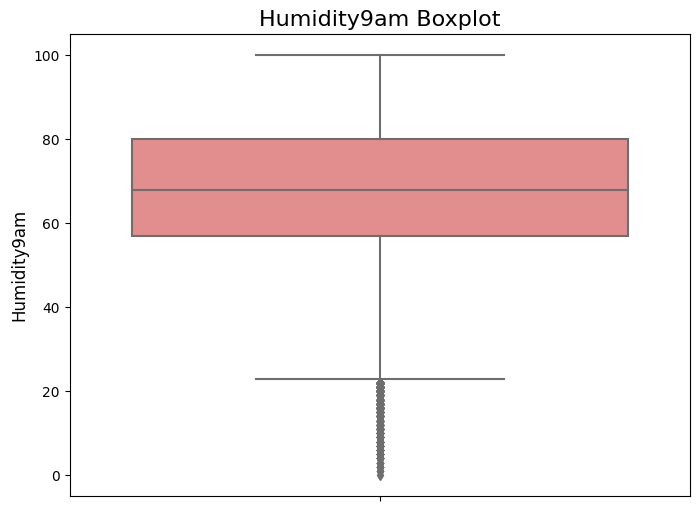

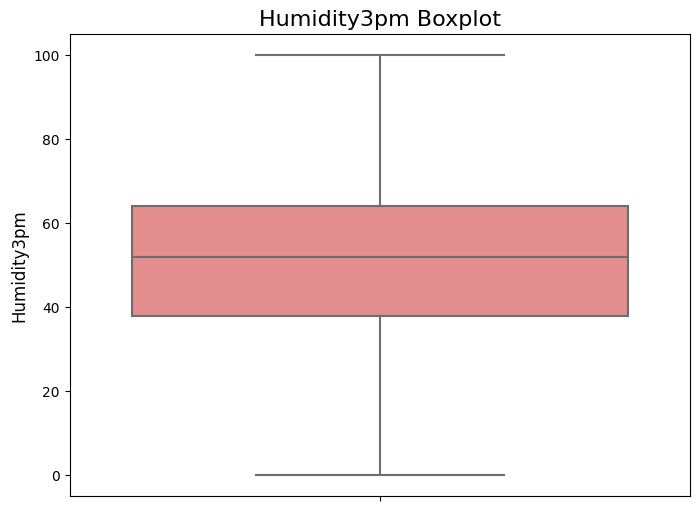

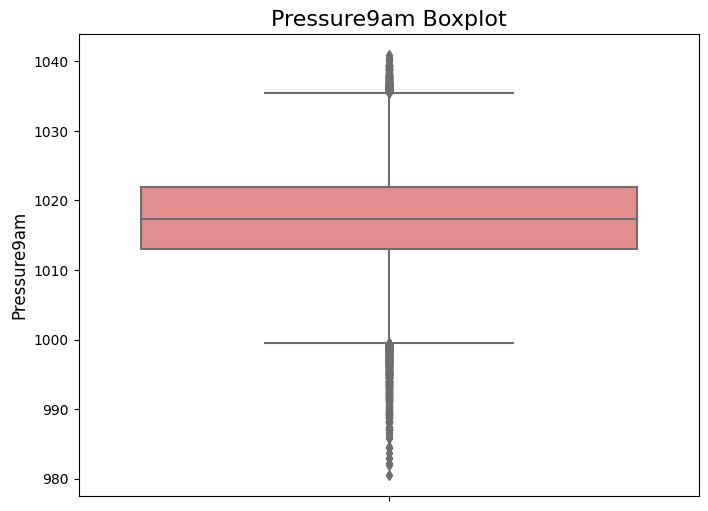

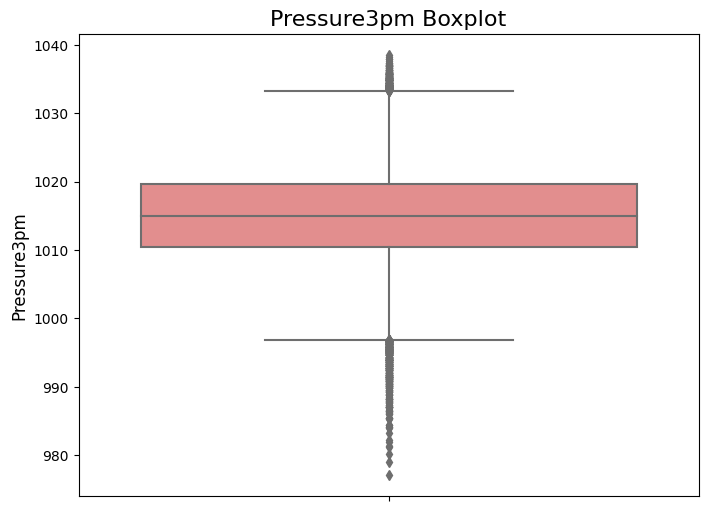

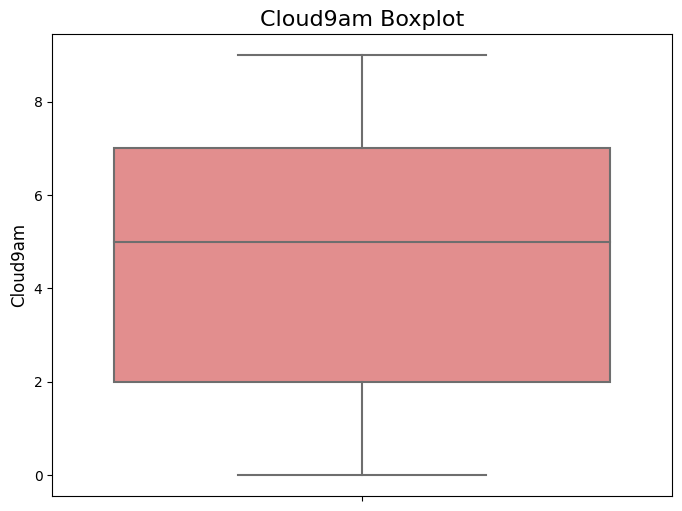

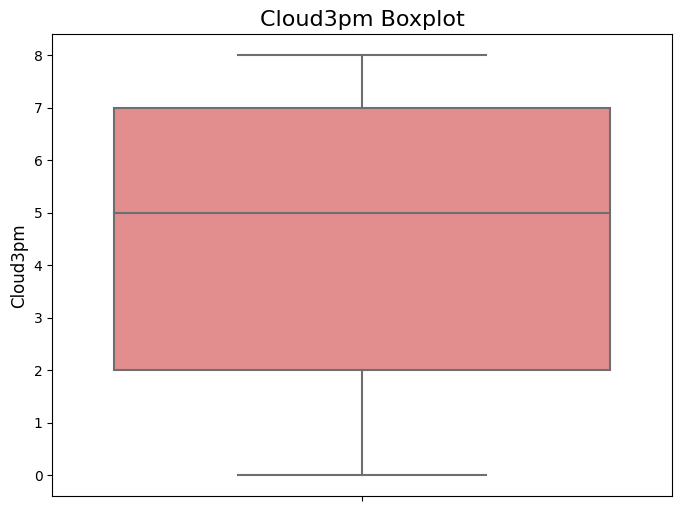

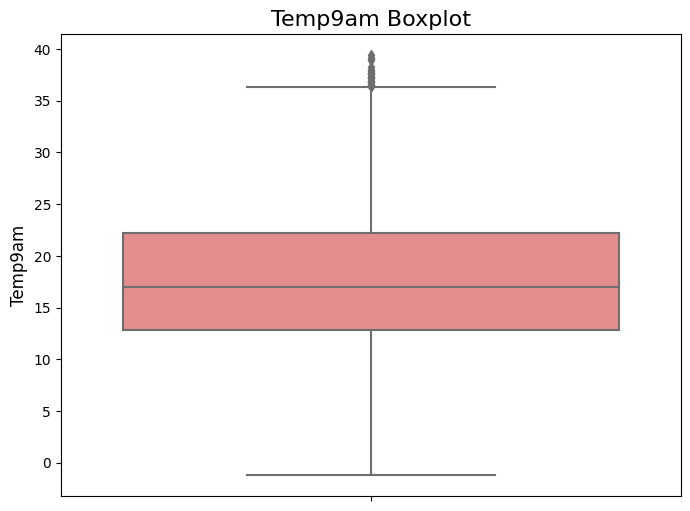

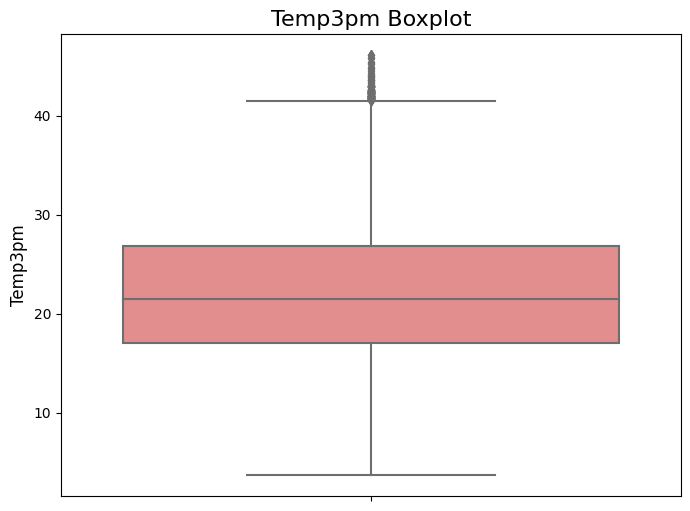

In [104]:
# Tüm sayısal sütunlar için kutu grafikleri
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'{col} Boxplot', fontsize=16)
    plt.ylabel(col, fontsize=12)
    plt.show()

* Kutu grafikleri, verinin dağılımını incelemek için çok faydalıdır. Bu grafikler, veri setindeki merkezi eğilimi (medyan), yayılımı (çeyrekler arası mesafe), ve uç değerleri (outliers) hızlı bir şekilde görselleştirir.* 
Sayısal verilerde uç değerlerin (outliers) tespit edilmesi, modelleme adımlarında önemli bir rol oynar çünkü bu değerler, modelin doğruluğunu etkileyebilir. Boxplot, uç değerlerin kolayca tespit edilmesine olanak tanır .* 
Kutu grafikleri ayrıca sayısal verinin simetrik olup olmadığını, dağılımın normal olup olmadığını anlamak için de faydalıdır.

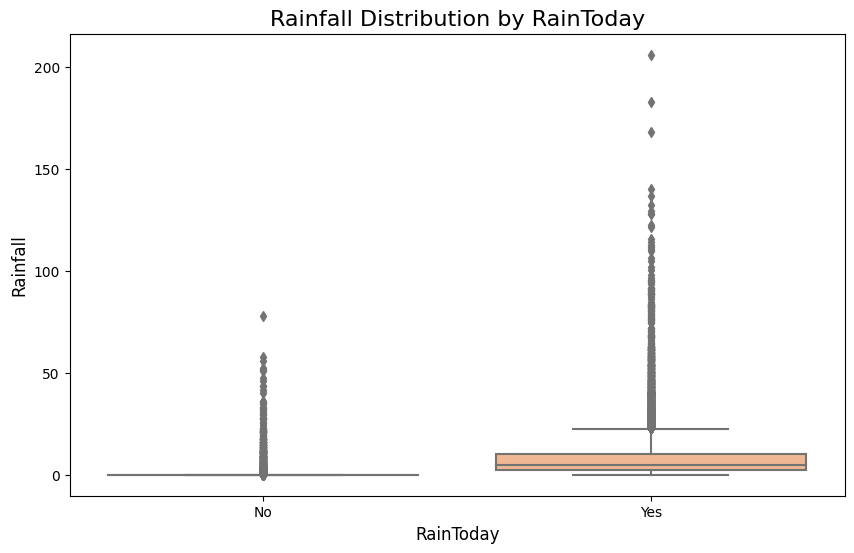

In [105]:
# RainToday kategorik sütununa göre Rainfall sayısal sütunu
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='RainToday', y='Rainfall', palette='pastel')  # X eksenine kategorik, Y eksenine sayısal sütun
plt.title('Rainfall Distribution by RainToday', fontsize=16)
plt.xlabel('RainToday', fontsize=12)
plt.ylabel('Rainfall', fontsize=12)
plt.show()


* Kategorik veriye göre sayısal verilerin dağılımını anlamanın etkili bir yolu olan kutu grafikleri, her kategori için verinin merkezi eğilimini (medyan) ve yayılımını (çeyrekler arası mesafe) gösterir.* 
RainToday sütunu, yağmur olup olmadığını (evet/hayır gibi) gösteren bir kategorik değişken olabilir, bu nedenle Rainfall değerlerinin yağmur olup olmamasına göre nasıl değiştiğini analiz etmek önemlidir.* 
Kutu grafiği, aynı zamanda uç değerleri (outliers) kolayca tespit etmenize yardımcı olur. Bu, veriyi daha iyi analiz etmenize ve modelleme sürecinde dikkate almanız gereken noktaları belirlemenize olanak tanır.

In [106]:
# Uç değer analizi için fonksiyon
def detect_outliers(df, column):
    """Bir sütunda uç değerleri tespit eder.
    
    Args:
        df (pd.DataFrame): Veri seti.
        column (str): Analiz edilecek sütunun adı.
    
    Returns:
        list: Uç değerlerin indekslerini döndürür.
    """
    Q1 = df[column].quantile(0.25)  # İlk çeyrek
    Q3 = df[column].quantile(0.75)  # Üçüncü çeyrek
    IQR = Q3 - Q1  # Çeyrekler arası mesafe

    # Alt ve üst sınırları hesapla
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Uç değerlerin indekslerini bul
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers

# Veri setindeki tüm sayısal sütunlar için uç değer analizi
for col in numerical_features:
    outliers = detect_outliers(df, col)
    if len(outliers) > 0:
        print(f"'{col}' sütununda {len(outliers)} adet uç değer var.")
    else:
        print(f"'{col}' sütununda uç değer bulunamadı.")

'MinTemp' sütununda 30 adet uç değer var.
'MaxTemp' sütununda 53 adet uç değer var.
'Rainfall' sütununda 13066 adet uç değer var.
'Evaporation' sütununda 1522 adet uç değer var.
'Sunshine' sütununda uç değer bulunamadı.
'WindGustSpeed' sütununda 2706 adet uç değer var.
'WindSpeed9am' sütununda 1249 adet uç değer var.
'WindSpeed3pm' sütununda 1149 adet uç değer var.
'Humidity9am' sütununda 1371 adet uç değer var.
'Humidity3pm' sütununda uç değer bulunamadı.
'Pressure9am' sütununda 861 adet uç değer var.
'Pressure3pm' sütununda 707 adet uç değer var.
'Cloud9am' sütununda uç değer bulunamadı.
'Cloud3pm' sütununda uç değer bulunamadı.
'Temp9am' sütununda 27 adet uç değer var.
'Temp3pm' sütununda 125 adet uç değer var.


- **`detect_outliers(df, column)`**: Bu fonksiyon, belirli bir sayısal sütundaki uç değerleri tespit eder. Uç değerlerin tespiti için, ilk çeyrek (Q1) ve üçüncü çeyrek (Q3) ile çeyrekler arası mesafe (IQR) hesaplanır. Uç değerler, bu sınırların dışında kalan veriler olarak kabul edilir.
- **`Q1` ve `Q3`**: Bu değerler, sırasıyla veri setindeki verilerin alt ve üst çeyreklerini temsil eder. `quantile(0.25)` ve `quantile(0.75)` fonksiyonları bu değerleri hesaplar.
- **`IQR` (Interquartile Range)**: Çeyrekler arası mesafe, Q3 ile Q1 arasındaki farktır. Bu değer, verinin dağılımını ve yayılımını anlamak için kullanılır.
- **Alt ve üst sınır hesaplaması**: Uç değerler, genellikle Q1 - 1.5 * IQR (alt sınır) ve Q3 + 1.5 * IQR (üst sınır) dışında kalan veriler olarak kabul edilir.
- **Veri kontrolü**: Fonksiyon, sütundaki her bir değeri bu sınırlarla karşılaştırır ve uç değerlerin indekslerini döndürür.

#### Uygulama:
- **Veri setindeki tüm sayısal sütunlar için uç değer analizi yapılır**. Bu adımda, tüm sayısal sütunlar üzerinde `detect_outliers` fonksiyonu çalıştırılır ve her bir sütundaki uç değer sayısı ekrana yazdırılır.
  
#### Neden Uç Değer Analizi?
- **Veri Temizliği**: Uç değerler, modelin doğruluğunu olumsuz etkileyebilir. Bu nedenle, uç değerlerin belirlenmesi ve uygun şekilde işlenmesi gereklidir. Bazı durumlarda, uç değerler çıkarılabilir ya da dönüştürülebilir.
- **Model Performansı**: Uç değerler, özellikle regresyon ya da sınıflandırma modellerinde tahminleri yanlış yönlendirebilir. Bu yüzden, uç değerlerin belirlenmesi, modelin daha doğru sonuçlar üretmesine yardımcı olabilir.



Veri Temizliği: Uç değerler, modelin doğruluğunu olumsuz etkileyebilir. Bu nedenle, uç değerlerin belirlenmesi ve uygun şekilde işlenmesi gereklidir. Bazı durumlarda, uç değerler çıkarılabilir ya da dönüştürülebilir.

Model Performansı: Uç değerler, özellikle regresyon ya da sınıflandırma modellerinde tahminleri yanlış yönlendirebilir. Bu yüzden, uç değerlerin belirlenmesi, modelin daha doğru sonuçlar üretmesine yardımcı olabilir.

In [107]:
# Uç Değerleri Sınırlama Fonksiyonu
def cap_outliers(df, column):
    """Uç değerleri alt ve üst sınırlara indirger."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Sayısal sütunlarda uç değerleri sınırlama
for col in numerical_features:
    cap_outliers(df, col)

print("Uç değerler sınırlara indirildi.")

Uç değerler sınırlara indirildi.


Veriyi çok fazla kaybetmeden düzgün bir şekilde işleyebilmek için uç değerleri alt ve üst sınırlara indirgeyerek düzeltmeyi tercih ediyorum. Bu yaklaşım, uç değerlerin doğrudan silinmesinin veri kaybına yol açmasını engeller ve verinin tutarlılığını sağlar.

- **`cap_outliers(df, column)`**: Bu fonksiyon, belirli bir sütundaki uç değerleri alt ve üst sınırlara indirger. 
  - **Alt ve Üst Sınırlar**: Çeyrekler arası mesafe (IQR) kullanılarak, her sütun için alt ve üst sınırlar hesaplanır. `Q1 - 1.5 * IQR` ve `Q3 + 1.5 * IQR` hesaplamaları ile bu sınırlar belirlenir.
  - **Uç Değerlerin Düzeltilmesi**: Eğer bir değer alt sınıra göre düşük ya da üst sınıra göre yüksekse, bu değerler sırasıyla alt ve üst sınırlara çekilir. Bu işlem, `np.where()` fonksiyonu ile yapılır.
  
- **Uç Değerlerin Sınırlanması**: Verideki uç değerler, bu fonksiyon ile belirlenen alt ve üst sınırlarla değiştirilir. Bu, uç değerlerin modelin sonuçlarını olumsuz etkilemesinin önüne geçer.

#### Neden Uç Değerleri Sınırlama?
- **Veri Temizliği**: Uç değerler, özellikle regresyon ve sınıflandırma modellerinde, tahminlerin doğruluğunu düşürebilir. Bunları sınırlamak, daha güvenilir sonuçlar elde edilmesine yardımcı olur.
- **Model Performansı**: Uç değerler modelin genelleme yeteneğini bozabilir. Bu yüzden uç değerlerin alt ve üst sınırlara indirgenmesi, modelin daha doğru ve sağlıklı sonuçlar üretmesini sağlar.
  
#### Uygulama:
Bu işlem, veri setindeki tüm sayısal sütunlarda uygulanır. Kod, her bir sayısal sütun için `cap_outliers` fonksiyonunu çalıştırır ve uç değerleri sınırlara indirger. 

#### Sonuç:
Uç değerlerin sınırlanması, genellikle modelin doğruluğunu artıran önemli bir adımdır. Bu strateji, uç değerleri tamamen çıkarmaz, ancak uç değerlerin etkilerini azaltarak daha dengeli bir veri seti sağlar.


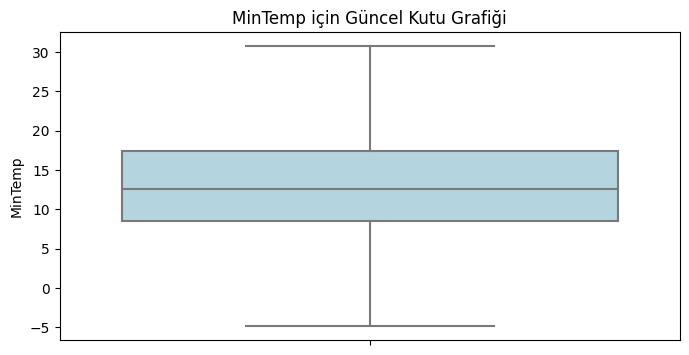

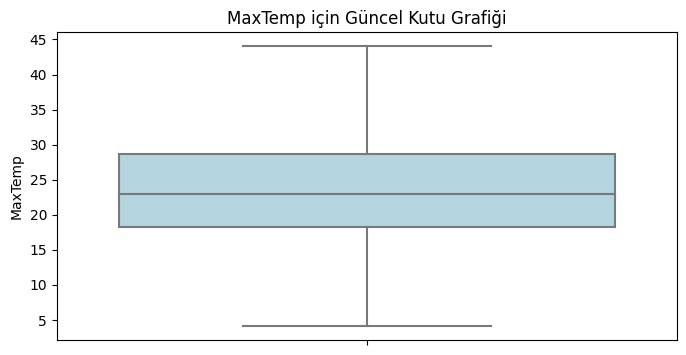

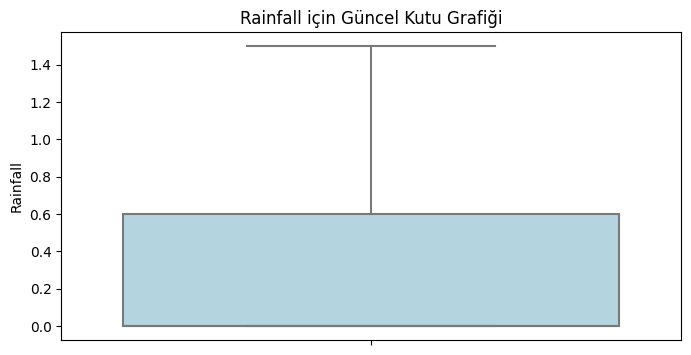

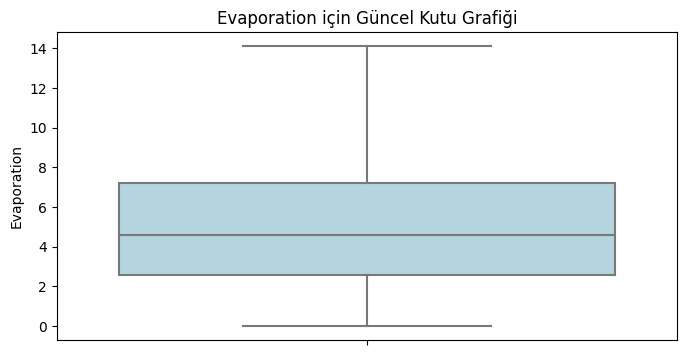

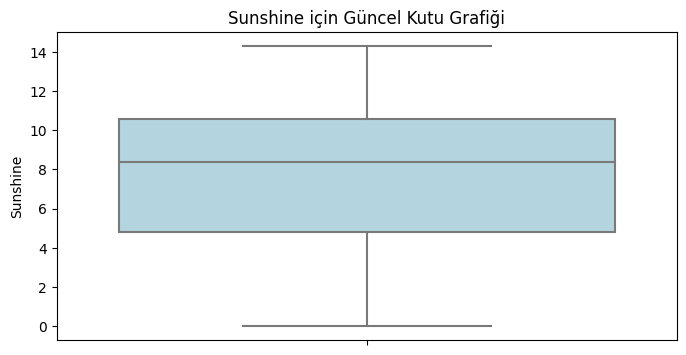

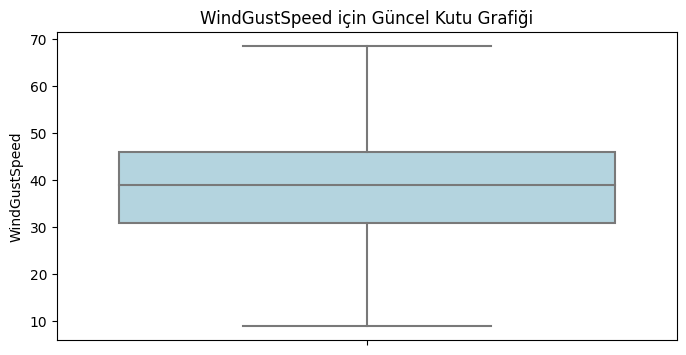

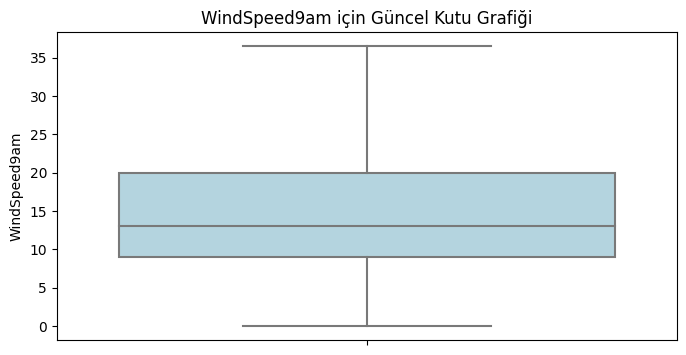

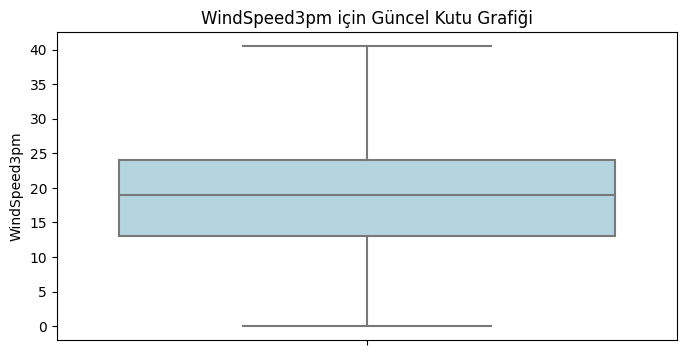

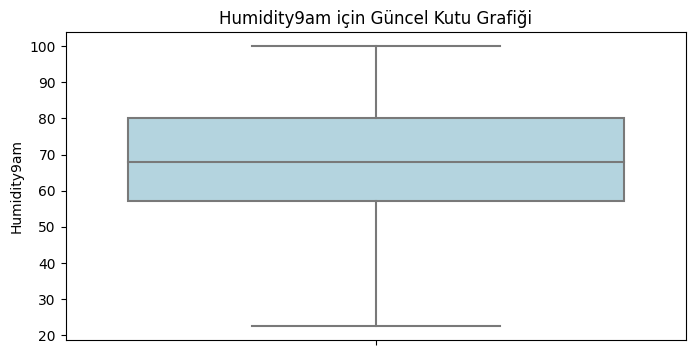

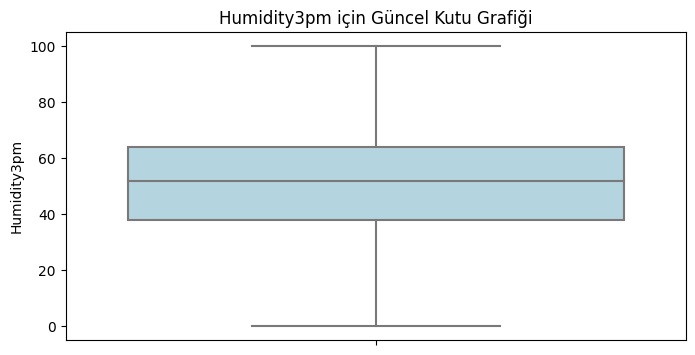

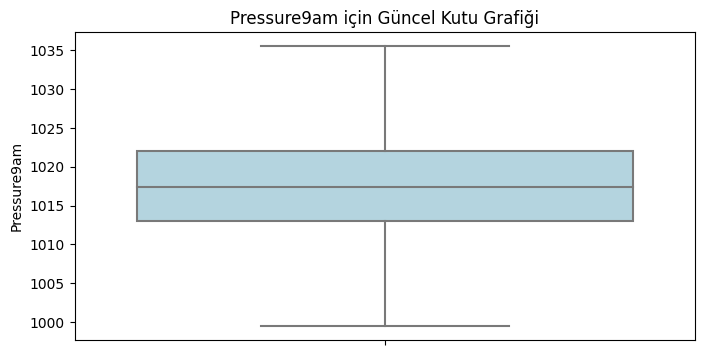

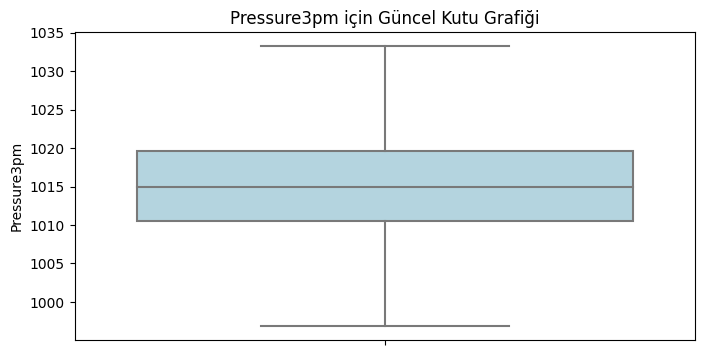

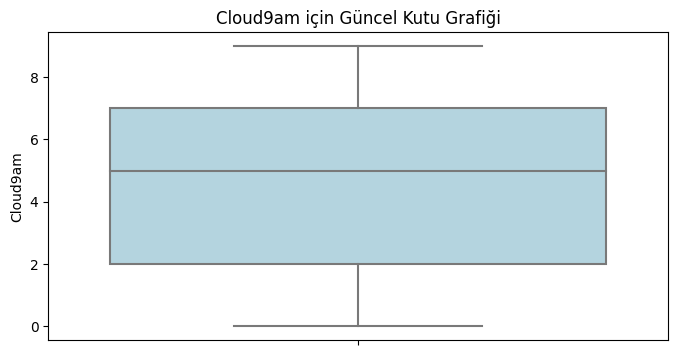

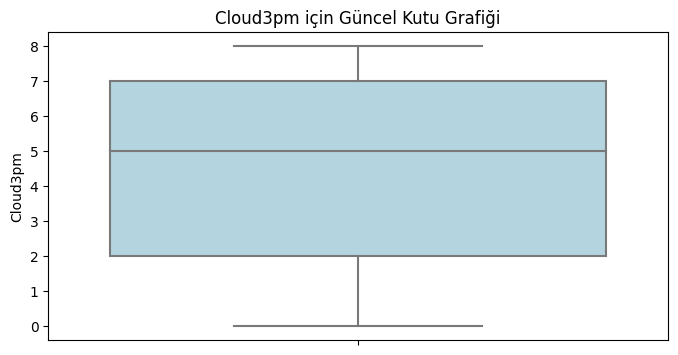

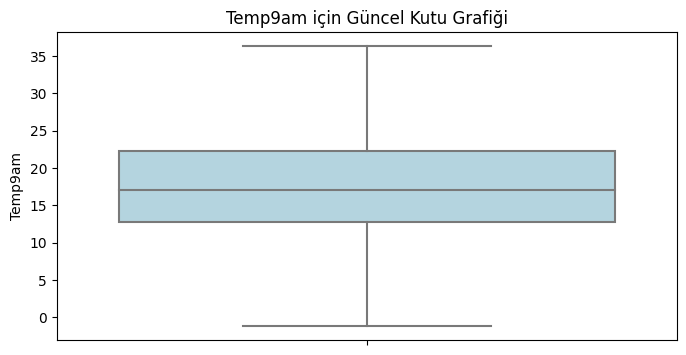

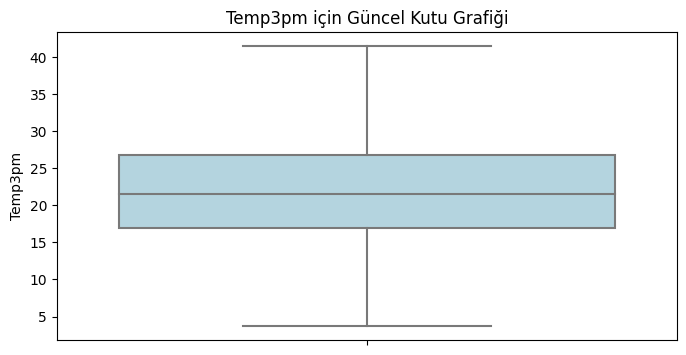

In [108]:
# Uç değerlerin sınırlanmasının ardından kutu grafikleri
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f'{col} için Güncel Kutu Grafiği')
    plt.ylabel(col)
    plt.show()

**Veri Dağılımını Anlamak:** Kutu grafikleri, verinin medyanı, çeyrekleri ve olası uç değerleri hakkında bilgi verir. Bu grafikler, uç değerlerin sınırlanmasının ardından verinin daha sağlıklı bir şekilde dağılıp dağılmadığını görmek için kullanılır.  

**Uç Değerlerin Etkisini Görselleştirmek:** Kutu grafikleri, uç değerlerin sınırlanmasından önce ve sonra verinin nasıl değiştiğini görselleştirmemizi sağlar. Bu sayede sınırlama işleminin etkisi daha iyi anlaşılabilir.


**Veri Setindeki Değişiklikleri Gösterme:** Bu grafik, uç değerlerin sınırlanmasından sonra veri setindeki olası düzelmeleri veya iyileşmeleri gözler önüne serer.



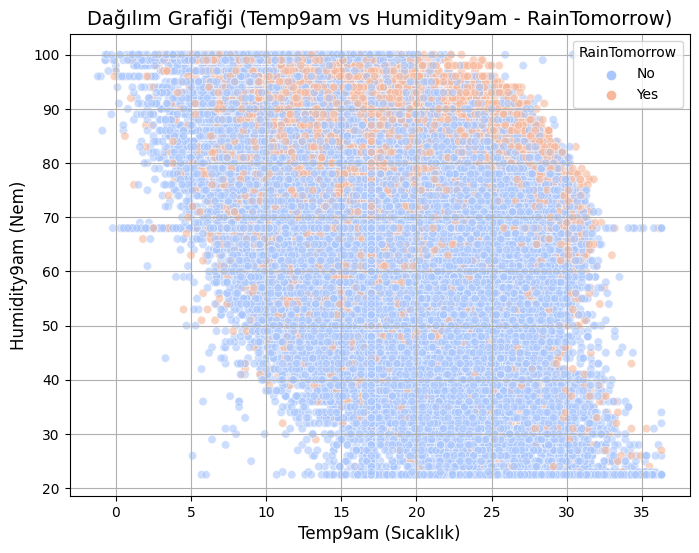

In [109]:
# Kategorik değişken ile dağılım grafiği
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp9am', y='Humidity9am', hue='RainTomorrow', data=df, palette='coolwarm', alpha=0.6)
plt.title('Dağılım Grafiği (Temp9am vs Humidity9am - RainTomorrow)', fontsize=14)
plt.xlabel('Temp9am (Sıcaklık)', fontsize=12)
plt.ylabel('Humidity9am (Nem)', fontsize=12)
plt.grid(True)
plt.show()

İlişkiyi Görselleştirme: Bu grafik, Temp9am (sabah saatindeki sıcaklık) ile Humidity9am (sabah saatindeki nem) arasındaki ilişkiyi gösterir. Bu iki sayısal değişkenin arasında herhangi bir korelasyon veya örüntü olup olmadığını anlamamıza yardımcı olur.


Kategorik Değişkenin Etkisini Gözlemleme: RainTomorrow (yarının yağmurlu olup olmadığı) değişkeni, bu iki sayısal değişkenin nasıl farklılaştığını görmemizi sağlar. Yağmur olup olmamasına göre sıcaklık ve nem arasında belirli bir fark olup olmadığına bakarı
z.

Veri Analizinde Kolaylık Sağlama: Kategorik değişkenlerin (bu örnekte RainTomorrow) etkisini anlamak, verinin nasıl şekillendiği hakkında daha fazla bilgi edinmemize yardımcı olur. Bu tür grafikler, kategorik değişkenlerin veri üzerinde nasıl bir etkisi olduğunu anlamak için yaygın olarak kullanılır.

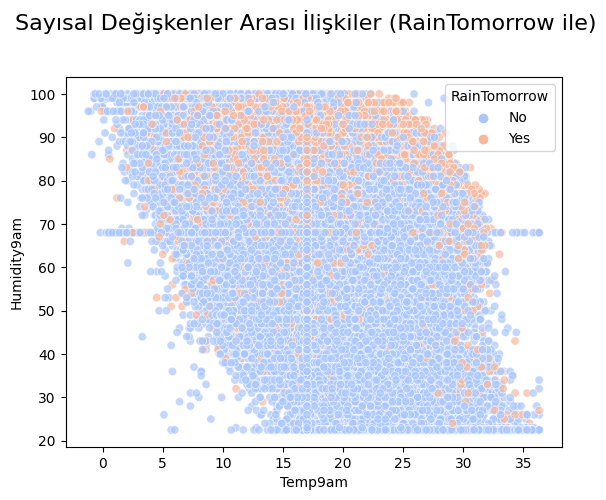

In [110]:
# Sayısal sütunlar için scatter plot seti
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Temp9am', y='Humidity9am', hue='RainTomorrow', data=df, palette='coolwarm', alpha=0.7)
plt.suptitle('Sayısal Değişkenler Arası İlişkiler (RainTomorrow ile)', y=1.02, fontsize=16)
plt.show()



İki Sayısal Değişkenin İlişkisini Görselleştirme: Temp9am ve Humidity9am değişkenlerinin ilişkisinin anlaşılması için scatter plot kullanılır. Bu grafik, bu iki değişken arasındaki olası doğrusal veya doğrusal olmayan ilişkileri gözlemlenmesini sağlar.


Yağmur Durumunun Etkisi: RainTomorrow kategorik değişkeni ile yapılan renk ayrımı, sıcaklık ve nem değerlerinin yağmur durumuna göre nasıl farklılaştığını gösterir. Bu tür görselleştirmeler, veri üzerinde kategorik değişkenlerin etkisini anlamamıza yardımcı olu
r.

Veri İnceleme: Sayısal değişkenler arasındaki ilişkileri görselleştirmek, verideki örüntüleri ve ilişkileri keşfetmek için önemlidir. Bu tür grafikler, veriyi daha iyi anlamamıza ve modelleme aşamasında hangi değişkenlerin önemli olabileceğini değerlendirmemize olanak tanır.

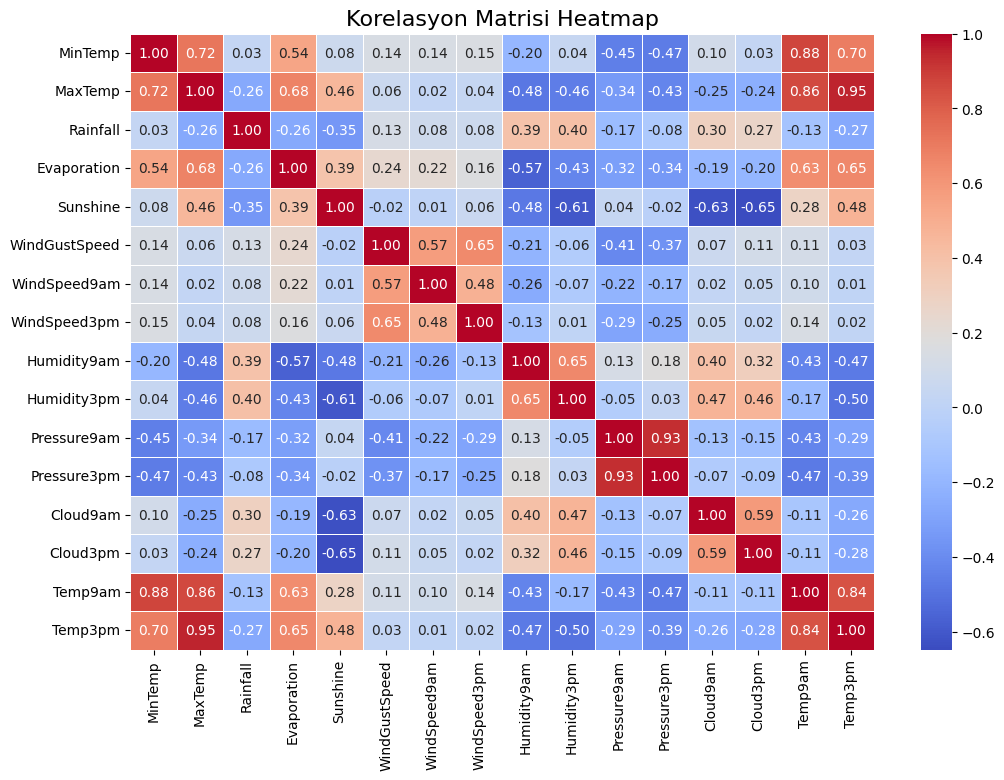

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi hesaplama (sayısal değişkenler için)
correlation_matrix = df[numerical_features].corr()

# Heatmap oluşturma
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,   # Her hücrede korelasyon değerlerini göster
            fmt=".2f",    # Ondalık formatı
            cmap="coolwarm", # Renk paleti
            linewidths=0.5) # Hücreler arasında çizgi

plt.title("Korelasyon Matrisi Heatmap", fontsize=16)
plt.show()

Veri Analizi ve Özellik Seçimi: Korelasyon matrisi, sayısal değişkenler arasındaki ilişkilerin anlaşılmasına yardımcı olur. Bu, özellikle özellik seçimi (feature selection) için önemlidir. Güçlü korelasyonlar, aynı bilgiyi tekrar eden özellikler olduğunda, modelin performansını artırmak için birini çıkarma kararı alınabilir.

Korelasyonları Görselleştirme: Sayısal değişkenler arasındaki ilişkilerin görsel olarak sunulması, veri analizinde verimli bir yol sağlar. Bu tür bir görselleştirme, veri setindeki güçlü ve zayıf ilişkileri hızlıca anlamamıza yardımcı olur.

In [112]:
# Korelasyon matrisi oluşturma
correlation_matrix = df[numerical_features].corr().abs()

# Üst üçgeni almak
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Eşik değerine göre yüksek korelasyonlu sütunları seçmek (örnek eşik: 0.85)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

# Yüksek korelasyona sahip sütunları çıkarma
df = df.drop(columns=high_corr_features)

print(f"Yüksek korelasyonlu sütunlar çıkarıldı: {high_corr_features}")

Yüksek korelasyonlu sütunlar çıkarıldı: ['Pressure3pm', 'Temp9am', 'Temp3pm']


#### Açıklama:
- **Korelasyon Matrisi**: İlk olarak, sayısal değişkenler arasındaki korelasyon hesaplanır ve `abs()` fonksiyonu ile bu değerler pozitif alınır. Korelasyon değeri, -1 ile 1 arasında bir değer olup, 1 tamamen pozitif korelasyon, -1 tamamen negatif korelasyon ve 0 ise hiçbir ilişki olmadığını gösterir.
  
- **Üst Üçgenin Seçilmesi**: Korelasyon matrisi simetrik olduğu için, sadece üst üçgeni almak yeterlidir. Bu, her değişkenin kendisiyle olan korelasyonunun zaten 1 olduğu için tekrarlamayı engeller.

- **Yüksek Korelasyonlu Özelliklerin Seçimi**: `upper_triangle[column] > 0.85` ifadesi, korelasyon değeri 0.85'ten büyük olan sütunları seçer. Bu eşik değeri, modelin eğitilmesi sırasında gereksiz özelliğin ortadan kaldırılmasına yardımcı olur. Yüksek korelasyonlu sütunlar, modelin performansını bozabilir ve genellikle çıkarılır.

- **Sütunları Çıkarma**: `df.drop(columns=high_corr_features)` komutu, yüksek korelasyona sahip sütunları veri setinden çıkarır.

#### Neden Bu Adım?
- **Veri Setinin Temizlenmesi**: Özellikle çok sayıda sayısal değişken içeren veri setlerinde, yüksek korelasyonlu sütunlar, modelin performansını olumsuz etkileyebilir. Bu sütunlar, aynı bilgiyi tekrar eder ve modelin gereksiz karmaşıklık oluşturmasına neden olabilir.
  
- **Model Performansını İyileştirme**: Özelliklerin arasında yüksek korelasyon olduğunda, modelin daha doğru ve daha az karmaşık hale gelmesi için bu sütunları çıkarmak iyi bir stratejidir. Ayrıca, bu adım, regresyon gibi bazı modellerde çoklu doğrusal bağıntıyı (multicollinearity) önlemeye yardımcı olabilir.

#### Sonuç:
Bu adım, yüksek korelasyonlu sütunların çıkarılmasıyla veri setindeki gereksiz bilgilerden arındırmayı ve daha anlamlı, etkili bir model elde etmeyi sağlar.

In [113]:
# Yeni bir özellik: Sıcaklık ve buharlaşma oranı
df['TempEvaporationRatio'] = df['MaxTemp'] / (df['Evaporation'] + 1e-5)

# Kategorik değişkenler için one-hot encoding
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Tarih bilgisi varsa yeni özellikler türet
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['IsWeekend'] = df['Date'].dt.weekday.isin([5, 6]).astype(int)

# Sonuçları kontrol et
print("Yeni özellikler eklendi:")
print(df.head())

Yeni özellikler eklendi:
           Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049 2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
6050 2009-01-02    Cobar     18.4     28.9       0.0         14.1      13.0   
6051 2009-01-03    Cobar     15.5     34.1       0.0         12.6      13.3   
6052 2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053 2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   

      WindGustSpeed  WindSpeed9am  WindSpeed3pm  ...  WindDir3pm_SSE  \
6049           48.0           6.0          20.0  ...           False   
6050           37.0          19.0          19.0  ...            True   
6051           30.0          13.0           7.0  ...           False   
6052           46.0          30.0          15.0  ...           False   
6053           31.0           6.0           6.0  ...           False   

      WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  

1. **Yeni Özellik: Sıcaklık ve Buharlaşma Oranı (`TempEvaporationRatio`)**
   - Bu yeni özellik, sıcaklık (`MaxTemp`) ve buharlaşma oranının (`Evaporation`) bir oranını alır. Bu oran, atmosferdeki buharlaşma miktarının sıcaklıkla nasıl ilişkilendiğini incelemek için kullanılabilir. `1e-5` değeri, sıfıra bölme hatalarından kaçınmak için eklenmiştir.
   
   Bu özellik, özellikle iklimsel analizlerde faydalı olabilir, çünkü sıcaklık arttıkça buharlaşma oranının değişimi önemli olabilir.

2. **Kategorik Değişkenler İçin One-Hot Encoding**
   - Kategorik değişkenler, makine öğrenmesi modellerine dahil edilmeden önce genellikle sayısal verilere dönüştürülmelidir. `pd.get_dummies()` fonksiyonu, belirtilen kategorik sütunlar için one-hot encoding uygular. Bu işlem, her kategoriyi bir sütun olarak temsil eder ve her bir kategoriye bir `1` veya `0` değeri verir. 
   - `drop_first=True`, ilk kategoriyi düşürerek, her kategoriyi bağımsız bir özellik olarak kodlar. Bu, çoklu doğrusal bağımlılığın önlenmesine yardımcı olur.
     
   
3. **Tarih Bilgisi Varsa Yeni Özellikler Türetme**
   - Eğer veri setinde `Date` sütunu varsa, bu tarih bilgisi üzerinde yeni özellikler türetilir. Tarih bilgisi, yıl, ay, gün gibi alt bileşenlere ayrılır ve ayrıca hafta sonu olup olmadığı (`IsWeekend`) hesaplanır. Bu, zamanla ilgili analizler yaparken faydalı olabilir.
 
   - **`Year`, `Month`, `Day`**: Tarih bilgisinin yıl, ay ve gün olarak ayrılması, zaman serisi analizlerinde kullanılabilecek bilgiler sağlar.
   - **`IsWeekend`**: Hafta sonu olup olmadığı bilgisi, özellikle ticaret ve hava durumu gibi uygulamalarda önemlidir.

#### Neden Bu Adımlar?
- **Yeni Özelliklerin Eklenmesi**: Veri setine yeni özellikler eklemek, modelin daha zengin bilgi ile eğitilmesini sağlar. Örneğin, sıcaklık ve buharlaşma oranı, hava durumu ile ilgili önemli bir ilişkiyi temsil edebilir. Tarih bilgisinden türetilen özellikler, mevsimsel değişimleri veya haftanın günlerine bağlı desenleri analiz etmek için kullanılabilir.
  
- **Kategorik Değişkenlerin One-Hot Encoding'i**: Kategorik veriler, sayısal verilere dönüştürülmeden makine öğrenmesi algoritmaları tarafından işlenemez. One-hot encoding, bu verileri sayısal bir formatta modelin anlayabileceği şekilde dönüştürür.

- **Tarih Bilgisinden Yeni Özellikler**: Tarihsel veri, bir modelin mevsimsel değişikliklere, günün saatine veya hafta sonu gibi faktörlere duyarlı olmasını sağlayabilir. Bu yeni türetilen özellikler, zamanın etkilerini daha iyi anlamaya yardımcı olur.

#### Sonuç:
Bu adımlar, veri setine yeni ve anlamlı özellikler ekleyerek modelin doğruluğunu ve analizlerin derinliğini artırabilir. Yeni özellikler, veri setine daha fazla bilgi katmanı sağlar ve modeli daha esnek ve güçlü hale getirir.